# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [8]:
!pip install pyro-ppl
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

    100% |████████████████████████████████| 215kB 8.3MB/s 
    100% |████████████████████████████████| 61kB 21.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/89/2b/1e8facc32da9dbd01a6ad343300cd09a5506f538f4b6407a32
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built pyro-ppl opt-einsum


## Generating single value from normal distribution with given mean and variance

In [0]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(5.9077)


In [0]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Poisson(rate=4))
print(x)

tensor(1.)


## Sampling from categorical probabilities with given probabilities

In [0]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

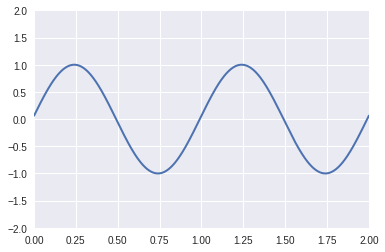

In [0]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

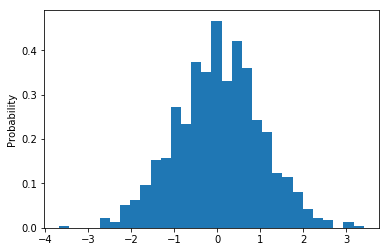

In [0]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

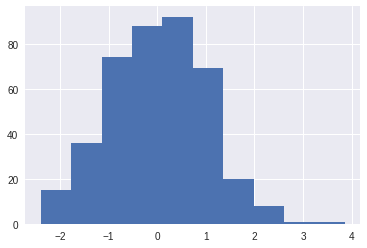

In [46]:
def histo():
    n = 25
    number_of_frames = 100
    data = []

    def update_hist(num, data):
        plt.cla()
        data.append(pyro.sample("normal_sampling", pyro.distributions.Normal(0, 1)))
        data.append(pyro.sample("normal_sampling", pyro.distributions.Normal(0, 1)))
        data.append(pyro.sample("normal_sampling", pyro.distributions.Normal(0, 1)))
        data.append(pyro.sample("normal_sampling", pyro.distributions.Normal(0, 1)))
        plt.hist(data)
        
        
    fig = plt.figure()
    hist = plt.hist(data)

    anim = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
    return HTML(anim.to_jshtml())

#distribution()
histo()

## Task 2

In [0]:
test_negative_sick = 0.01
test_positive_sick = 0.99
test_positive_healthy = 0.02
test_negative_healthy = 0.98



def Bayes(sick_people, size_of_population):
  healthy_people = size_of_population - sick_people

  
  sickness_prob = sick_people/size_of_population
  health_prob = 1 - sickness_prob
  
  return (test_positive_sick * sickness_prob)/\
  (test_positive_sick * sickness_prob + test_positive_healthy * health_prob)

In [0]:

def generate_population(size_of_pop, sick_people):

  sickness_prob = sick_people/size_of_pop
  health_prob = 1 - sickness_prob
  
  
  dist_of_sickness_in_pop = pyro.distributions.Categorical(probs = torch.tensor([health_prob, sickness_prob]))#0 - healthy, 1 - sick
  dist_of_sick = pyro.distributions.Categorical(probs = torch.tensor([0.01, 0.99])) #1 - test shows that the person is sick 
  dist_of_healthy = pyro.distributions.Categorical(probs = torch.tensor([0.98, 0.02])) #0 - test shows that the person is healthy
  
  sick_p_test,sick_n_test,health_p_test = 0, 0, 0

  for elem in range(size_of_pop):

    if(pyro.sample("categorical_sampling", dist_of_sickness_in_pop) == 0): #if the person is healthy
      if (pyro.sample("categorical_sampling", dist_of_healthy)):
        health_p_test += 1
      
    else: #the person is sick
      if (pyro.sample("categorical_sampling", dist_of_sick)):
        sick_p_test += 1
      else:
        sick_n_test += 1
  
  return  sick_p_test/(health_p_test + sick_p_test)

In [0]:
bay, sim, sick_ppl = [], [], []
size_of_pop = 50000
for i in range (100):
  bay.append(Bayes(i, size_of_pop))
  sim.append(generate_population(size_of_pop, i))
  sick_ppl.append(i)

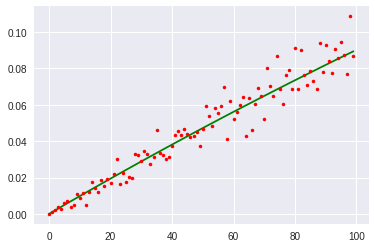

In [44]:
fig, ax = plt.subplots()
plt_bayes = ax.plot(sick_ppl, bay, 'green')
plt_simulated = ax.plot(sick_ppl, sim, 'r.')

### END OF TASK 2

In [0]:
n=50000 # nb of people

def generate_population(n):
  people = []

  #x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))

  dist_of_sickness_in_pop = pyro.distributions.Categorical(probs = torch.tensor([0.99, 0.01]))#0 - healthy, 1 - sick
  dist_of_sick = pyro.distributions.Categorical(probs = torch.tensor([0.01, 0.99])) #1 - test shows that the person is sick 
  dist_of_healthy = pyro.distributions.Categorical(probs = torch.tensor([0.98, 0.02])) #0 - test shows that the person is healthy

  print(pyro.sample("categorical_sampling", dist_of_sickness_in_pop))

  for elem in range(n):
    person = pyro.sample("categorical_sampling", dist_of_sickness_in_pop)

    if(person == 0): #if the person is healthy
      test = pyro.sample("categorical_sampling", dist_of_healthy)
      person = (person, test)
      
    else: #the person is sick
      test = pyro.sample("categorical_sampling", dist_of_sick)
      person = (person, test)
    
    people.append(person)
  
  return people

population = generate_population(n)
    

tensor(0)


In [0]:
positive_test = [x for x in population if x[1] == 1]

pos_tst = len(positive_test)
nmb_of_detected_sick_people= sum(x[0] for x in positive_test)
P = float(nmb_of_detected_sick_people)/float(pos_tst)
P

0.31471389645776565

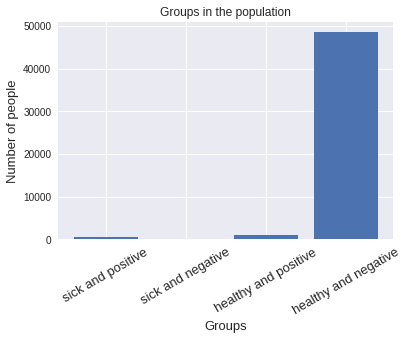

In [0]:
label = ['sick and positive', 'sick and negative', 'healthy and positive', 'healthy and negative']

sick_and_positive = sum([1 for x in population if( x[0] == 1 and x[1] == 1)])
sick_and_negative = sum([1 for x in population if( x[0] == 1 and x[1] == 0)])
healthy_and_positive = sum([1 for x in population if( x[0] == 0 and x[1] == 1)])
healthy_and_negative = sum([1 for x in population if( x[0] == 0 and x[1] == 0)])

ppl =[sick_and_positive,sick_and_negative,healthy_and_positive,healthy_and_negative]


index = np.arange(len(label))
plt.bar(index, ppl)
plt.xlabel('Groups', fontsize=13)
plt.ylabel('Number of people', fontsize=13)
plt.xticks(index, label, fontsize=13, rotation=30)
plt.title('Groups in the population')
plt.show()

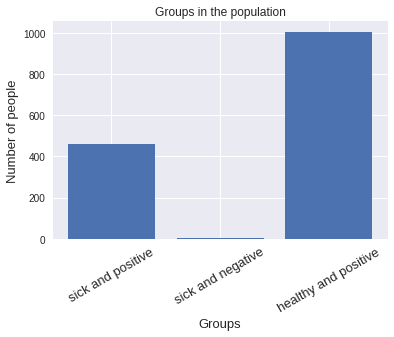

In [0]:
label = label[:-1]
ppl = ppl[:-1]
index = np.arange(len(label))
plt.bar(index, ppl)
plt.xlabel('Groups', fontsize=13)
plt.ylabel('Number of people', fontsize=13)
plt.xticks(index, label, fontsize=13, rotation=30)
plt.title('Groups in the population')
plt.show()

In [0]:
def histo():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    #ax.set_xlim(( 0, 2))
    #ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    samples = []
    
    def rand_pick(i):
      
      mean = 0
      variance = 10
      x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
      samples.append(x)
      plt.cla()
      plt.hist(samples,bins = 100)
      #return plt
      
    # initialization function: plot the background of each frame
    def init():
      line.set_data([], [])
      return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, rand_pick, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

histo()

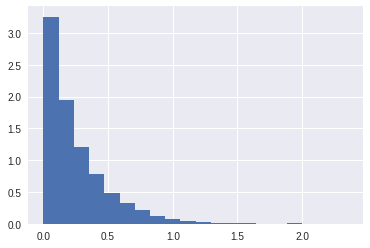

In [0]:
#x = np.random.normal(size = 1000)
#plt.hist(x, density=True, bins=30)
#plt.ylabel('Probability');

def histo():
  rate = 4
  x =[]
  for elem in range(10000):
    x.append(pyro.sample("normal_sampling", pyro.distributions.Exponential(rate)))
  plt.hist(x, density=True, bins=20)
#plt.ylabel('Probability');
histo()

In [0]:
## Insert solution here
#from scipy.stats import
def distribution():
  
  # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        #y = np.sin(2 * np.pi * (x - 0.01 * i))
        mean = 0
        variance = 2
        y = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())


  